# Introduction

In this repport we analyze criminal incident data from Seattle or San Francisco to visualize patterns and contrast and compare patterns across the two cities. The data is limited to the summer of 2014, and was originally extracted from 

* [_San Francisco Data Portal_](https://data.sfgov.org/),[_Full San Francisco incident dataset_](https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry)
* [_Seattle Data Portal_](https://data.seattle.gov/), [_Full Seattle incident dataset_](https://data.seattle.gov/Public-Safety/Seattle-Police-Department-Police-Report-Incident/7ais-f98f)

In this document we aim to compair the patterns of reported incidents during the summer 2014 between both cities. We focus on the following issues

* type of incidents reported
* the quantity of incidents normalized by the city population or city area
* the evolution of reported incidents accross the time period
* Within the time period the evolution of the number of incident during the week and during the day

# Data processing

We shall proceed to the analisys within `jupyter notebook` with a `Python 2` kernel (python 2.7). In order to process the data, we use the fooloowing packages. 

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from collections import Counter
from IPython.display import set_matplotlib_formats

In [2]:
# this code should not appear in pdf
%matplotlib inline
set_matplotlib_formats('png', 'pdf')
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 3)
def _repr_latex_(self):
    return "%s" % self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_  
warnings.filterwarnings('ignore')

## Crime incident data sets: Summer 2014

The data set used for this report cna be found using the foolowing links

* [**San Francisco Summer 2014 dataset**](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv)
* [**Seattle Summer 2014 dataset**](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/seattle_incidents_summer_2014.csv)

We first extract the data and then show the first 6 rows of each data sets.

In [3]:
df_sf = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")
df_seattle = pd.read_csv("seattle_incidents_summer_2014.csv") 

In [4]:
df_sf.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.406,37.738,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435,37.762,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.410,37.780,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485,37.773,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.510,37.772,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.417,37.774,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.417,37.774,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.417,37.774,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424,37.747,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.411,37.792,"(37.7923158747647, -122.410845624227)",14073425827195


In [5]:
df_seattle.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.301,-122.365,47.683,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.100,-122.277,47.640,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.501,-122.349,47.529,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.100,-122.335,47.612,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.202,-122.329,47.686,"(47.685959879, -122.329378505)",6,2014


It is clear that both data set have very differents schema, and on top of that crime description seems to strongly differ between the 2 data sets. 

In [6]:
norm_city = pd.DataFrame({
    "population 2010":[805235,608660],
    "population 2016":[870887,704352],
    "area":[121.5,217.0]},
    index=["San Francisco","Seattle"])
# Make an estimation based on the estimated slope
norm_city["population"] =4./6.*(norm_city["population 2016"]-
    norm_city["population 2010"]) + norm_city["population 2010"]
norm_city = norm_city.round({"population":0})

In [7]:
norm_city

,area,population 2010,population 2016,population
San Francisco,121.5,805235,870887,849003.0
Seattle,217.0,608660,704352,672455.0


## Additionnal data: city area and population census

We use data from https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population to get an estimate of the population sensus of both cities in order to derive the crime per capita.
On not of extracting the population in 2014, we also extract the city area in km$^2$

## Data extraction toward common schema

The issue is that both data set have different schema. In order to make a accurate comparison between cities we need to define information that is common to both data set and extract it

Typically the incident numbers and code are not relevent as thay may differ between data type. As for the location of the crime indicate either by coordinates, neighborhood or address, it is maily relevant to one city in particular but not both cities. Still it may prove useful to draw some classification such as "center", "suburbs" based on location.

The aspect in common between the two data sets are obviously the type of crime, the date and time it occurs.
So our task is to extract in the exact same format:

1. the category of the crime commited
1. the date and time the crime was committed

### Crime incident classification

* For the San Francisco dataset we shall use the "Category' (with one variation descirbed below)
* For the Seattle dataset we shall use the "Summarized Offense Description"

In both case we use the `Counter` method to count the number of occurance of each initial category of incident and regroup these categories into families. The result classification is then added to each dataset as a new feature "Crime". 

#### Classifying crimes for San Francisco


Among several classification which seemed too generic, we found upon closer examination that  "SECONDARY CODES" classification ought to be expended. That means that we replace this category by its more detailed description.  

We use the more generic "Category" of the Seattle cirme incident database to classify events into 6 categories.
We show at the end of the classification scheme which crime classification have been neglected.

In [8]:
df_sf["Category"].loc[
    df_sf["Category"]=="SECONDARY CODES"
    ] = df_sf["Descript"].loc[df_sf["Category"]=="SECONDARY CODES"]

In [9]:
dfcat_sf = pd.DataFrame.from_dict(Counter(df_sf["Category"]),orient='index'
        ).rename(columns={'index':'category', 0:'count'})
dfcat_sf["type"] = "other"
# build categroires from index
#--------------------
dfcat_sf["type"].loc[
    ["BRIBERY","FRAUD","EMBEZZLEMENT","FORGERY/COUNTERFEITING","EXTORTION","TRESPASS"]
    ] = "Fraud"
#--------------------
dfcat_sf["type"].loc[
    ["ATM RELATED CRIME","LARCENY/THEFT","VEHICLE THEFT","STOLEN PROPERTY",
     "LOITERING","ROBBERY","BURGLARY"]
    ] = "Theft"
#--------------------
dfcat_sf["type"].loc[
    ["DISORDERLY CONDUCT","DRUG/NARCOTIC","DRUNKENNESS","GAMBLING",
     "DRIVING UNDER THE INFLUENCE","WEAPON LAWS","GANG ACTIVITY","LIQUOR LAWS"]
    ] = "Alcohol/Drugs/Firearms"
#--------------------
dfcat_sf["type"].loc[
    ["PORNOGRAPHY/OBSCENE MAT","PROSTITUTION"]
    ] = "Pornography/Prostitution"
#--------------------
dfcat_sf["type"].loc[
    ["DOMESTIC VIOLENCE","ASSAULT","FAMILY OFFENSES","SUICIDE",
    "PREJUDICE-BASED INCIDENT","KIDNAPPING"]
    ] = "Violence"
#--------------------
dfcat_sf["type"].loc[
    ["VANDALISM","ARSON"]
    ] = "Property damage"
#--------------------
print "Unclassified %5.2f %s" %(
    dfcat_sf["count"].loc[dfcat_sf["type"]=="other"].sum()
    /(0.01*dfcat_sf["count"].sum()),"%")
for cat in dfcat_sf.loc[dfcat_sf["type"]=="other"].index:
    print "%25s %5.2f %s" %(cat, 
    dfcat_sf["count"].loc[cat]/(0.01*dfcat_sf["count"].sum()),"%")

Unclassified 38.20 %
                 WARRANTS  6.15 %
           SUSPICIOUS OCC  4.48 %
           OTHER OFFENSES 12.30 %
             NON-CRIMINAL 10.43 %
        JUVENILE INVOLVED  0.26 %
                  RUNAWAY  0.21 %
           MISSING PERSON  4.37 %


The result of the classification appears bellow, we indicate the number of incident and their percentile per category with respect to the total number of incodents. We do not yet neglect unclassified incidents.

In [10]:
type_sf = pd.DataFrame(dfcat_sf.groupby("type")["count"].sum())
type_sf["percentile"] = type_sf["count"]/(0.01*type_sf["count"].sum())
type_sf["percentile crime"] = type_sf["count"]/(0.01*type_sf["count"].sum())
type_sf

,count,percentile,percentile crime
type,,,
Alcohol/Drugs/Firearms,2046,7.057,7.057
Fraud,559,1.928,1.928
Pornography/Prostitution,113,0.390,0.390
Property damage,80,0.276,0.276
Theft,11790,40.665,40.665
Violence,3330,11.486,11.486
other,11075,38.199,38.199


#### Classifying crimes for Seattle

We use the more generic "Summarized Offense Description" of the Seattle cirme incident database to classify events into the same categories as used for the San Francisco one. We once again show, which crime classification have been neglected.

In [11]:
dfcat_seattle = pd.DataFrame.from_dict(
    Counter(df_seattle["Summarized Offense Description"])
    ,orient='index').rename(columns={'index':'category', 0:'count'})
dfcat_seattle["type"] = "other" 
#--------------------
dfcat_seattle["type"].loc[
    ["EMBEZZLE","COUNTERFEIT","FRAUD","FORGERY","TRESPASS","THEFT OF SERVICES"]
    ] = "Fraud"
#--------------------
dfcat_seattle["type"].loc[
    ["ROBBERY","PURSE SNATCH","BURGLARY-SECURE PARKING-RES",
     "SHOPLIFTING","BURGLARY","OTHER PROPERTY","VEHICLE THEFT",
     "STOLEN PROPERTY","BIKE THEFT","PICKPOCKET","MAIL THEFT","CAR PROWL"]
    ] = "Theft"
#--------------------
dfcat_seattle["type"].loc[
    ["WEAPON","DUI","NARCOTICS","LIQUOR VIOLATION","TRAFFIC","DISORDERLY CONDUCT"]
    ] = "Alcohol/Drugs/Firearms"
#--------------------
dfcat_seattle["type"].loc[
    ["PROSTITUTION","PORNOGRAPHY"]
    ] = "Pornography/Prostitution"
#--------------------
dfcat_seattle["type"].loc[
    ["THREATS","BIAS INCIDENT","HOMICIDE","ASSAULT","DISPUTE"]
    ] = "Violence"
#--------------------
dfcat_seattle["type"].loc[
    ["RECKLESS BURNING","PROPERTY DAMAGE"]
    ] = "Property damage"
#--------------------
print "Unclassified %5.2f %s" %(
    dfcat_seattle["count"].loc[dfcat_seattle["type"]=="other"].sum()
    /(0.01*dfcat_seattle["count"].sum()),"%")
for cat in dfcat_seattle.loc[dfcat_seattle["type"]=="other"].index:
    print "%25s %5.2f " %(cat, 
    dfcat_seattle["count"].loc[cat]/(0.01*dfcat_seattle["count"].sum()))

Unclassified  8.92 %
                 OBSTRUCT  0.12 
             FALSE REPORT  0.07 
              DISTURBANCE  4.07 
         ANIMAL COMPLAINT  0.29 
       RECOVERED PROPERTY  0.10 
          ILLEGAL DUMPING  0.08 
           WARRANT ARREST  3.11 
 VIOLATION OF COURT ORDER  0.27 
          PUBLIC NUISANCE  0.01 
                  ELUDING  0.02 
 [INC - CASE DC USE ONLY]  0.02 
                 FIREWORK  0.03 
                   ESCAPE  0.01 
            LOST PROPERTY  0.49 
                   INJURY  0.22 


The result of the classification appears bellow, we indicate the number of incident and their percentile per category with respect to the total number of incodents. We do not yet neglect unclassified incidents.

In [12]:
type_seattle = pd.DataFrame(dfcat_seattle.groupby("type")["count"].sum())
type_seattle["percentile"] = type_seattle["count"]/(0.01*type_seattle["count"].sum())
type_seattle

,count,percentile
type,,
Alcohol/Drugs/Firearms,864,2.636
Fraud,2330,7.108
Pornography/Prostitution,205,0.625
Property damage,2388,7.285
Theft,20674,63.071
Violence,3395,10.357
other,2923,8.917


#### Classification bias

It is esential to point out that the classification we performed is bias on our own interpretation of the official classification. Certain crime may appear misclassified, and we neglect any possibility of overlap between classes.
As far as we are concerned the Seattle crime incident data base appear clearer and detailed as far as our classification is concerned. We have a lesser fractions of unclassifyed incident for Seattle than for San Francisco. 
However, kidnapings and missing persons do not appear in the Seattle incident base. 

Minor incident and incivilities ussually classify as others were neglected, as well as non-criminal acts and lost and found property. We also neglected warrants as it may be considered as a execution of a court order and not as a crime. 
An other exemple in the San Francisco incident data base is the "JUVENILE INVOLVED" description in "SECONDARY CODES", it is unclear whether it could be theft related, gang releated, violence related or worse.
We wish to clarify that this classification is subject to caution, and does not reflect the severity of the the crime. 
Conclusions drown from this classification and ensuring vizualisation should be taken with extreme caution. 

In [13]:
# Implement the new classification for each data set
dict_sf = dfcat_sf["type"]
df_sf["Crime"] = map(lambda x: dict_sf[x], df_sf["Category"])
dict_seattle = dfcat_seattle["type"]
df_seattle["Crime"] = map(lambda x: dict_seattle[x], 
        df_seattle["Summarized Offense Description"])
# Clean up data
del dict_sf,dict_seattle,dfcat_sf,dfcat_seattle

### Extracting dates and times

I the two data set the dates and time of occurance of the incident are described in different way and in diferent formats. 

* For the Seattle data set we use the "Occurred Date or Date Range Start" column. This data set also include other relevant dates thus providing the date of the end of the incident "Occurred Date Range End" and the reported date "Date Reported". These fields are not present in the other data set, and do not refer to the time period. Month and Year are also written seperatly, but we will extract them again later. 
* For the San Francisco data set we compibe the "Date" and "Time" columns. This data set alos provide the day of the weeday but this can be reextracted from the date, like month and year for the other data set. 

We then convert the data into a `datetime` instance added to each dataset as the new feature "datetime". Form this instance we should be able to extract additional fields such as the week number, weekday and hour.

In [14]:
df_sf["datetime"] = map(lambda x: datetime.strptime(x,
    '%m/%d/%Y %H:%M'),df_sf["Date"]+" "+df_sf["Time"])
df_seattle["datetime"] = map(lambda x: datetime.strptime(x,
    '%m/%d/%Y %I:%M:%S %p'),df_seattle["Occurred Date or Date Range Start"])

Since we have the actual dates we can even check the date range of the data sets, and find that it is not as we would expect cover summer 2014 from june 21$^{th}$ to September 23$^{rd}$, but from june 1$^{st}$ to August 31$^{st}$

In [15]:
print "{:15}".format("San Francisco"),"from",df_sf["datetime"].min(),"to",df_sf["datetime"].max()
print "{:15}".format("Seattle"),"from", df_seattle["datetime"].min(),"to",df_seattle["datetime"].max()
# save min for later 
startdate = min([df_sf["datetime"].min(),df_seattle["datetime"].min()])
enddate   = max([df_sf["datetime"].max(),df_seattle["datetime"].max()])

San Francisco   from 2014-06-01 00:01:00 to 2014-08-31 23:50:00
Seattle         from 2014-06-01 00:00:00 to 2014-08-31 23:50:00


In [16]:
startdate

Timestamp('2014-06-01 00:00:00')

## Resulting data set with common schema 

We build new datasets, in 3 stages:

1. Project the data on the "Crime" and "datatime" feature we created
1. Select rows by removing any unclassified incident
1. Create additioanal features
    1. "week": the week number corresponding to the date
    1. "weekday": the day of the week corresponding to the date where Monday is 0 and Sunday is 6, see list `calendar.day_name`
    1. "month": the mounth number corresponding to the date, see list `calendar.month_name`
    

In [17]:
# data projection and selection
data_sf = df_sf[["Crime","datetime"]].loc[df_sf["Crime"]!="other"]
data_seat = df_seattle[["Crime","datetime"]].loc[df_seattle["Crime"]!="other"]
# sort them by data
data_sf.sort_values("datetime",inplace=True)
data_seat.sort_values("datetime",inplace=True)

In [18]:
# feature creation from the time variable
data_seat["week"]    = map(lambda x: x.isocalendar()[1],data_seat["datetime"])
data_seat["weekday"] = map(lambda x: x.weekday(),data_seat["datetime"])
data_seat["month"]   = map(lambda x: x.month,data_seat["datetime"])
data_seat["day"]     = map(lambda x: (x-startdate).days,data_seat["datetime"])
data_seat["hour"]    = map(lambda x: x.time().hour,data_seat["datetime"])
data_sf["week"]    = map(lambda x: x.isocalendar()[1],data_sf["datetime"])
data_sf["weekday"] = map(lambda x: x.weekday(),data_sf["datetime"])
data_sf["month"]   = map(lambda x: x.month,data_sf["datetime"])
data_sf["day"]     = map(lambda x: (x-startdate).days,data_sf["datetime"])
data_sf["hour"]    = map(lambda x: x.time().hour,data_sf["datetime"])

In [19]:
data_sf.head()

,Crime,datetime,week,weekday,month,day,hour
28991,Theft,2014-06-01 00:01:00,22,6,6,0,0
28975,Fraud,2014-06-01 00:01:00,22,6,6,0,0
28977,Theft,2014-06-01 00:01:00,22,6,6,0,0
28979,Theft,2014-06-01 00:01:00,22,6,6,0,0
28980,Theft,2014-06-01 00:01:00,22,6,6,0,0


In [20]:
data_seat.tail()

,Crime,datetime,week,weekday,month,day,hour
894,Theft,2014-08-31 23:47:00,35,6,8,91,23
891,Violence,2014-08-31 23:48:00,35,6,8,91,23
892,Violence,2014-08-31 23:48:00,35,6,8,91,23
720,Violence,2014-08-31 23:50:00,35,6,8,91,23
719,Violence,2014-08-31 23:50:00,35,6,8,91,23


# Data visualization

## Comparing the total number of incidents for the 2 cities

In this section we simply use the incident classification we created and compare the number for the whole epriod of interest namely summer 2014.

In [21]:
# use count number of crime by class for either cities
cc_seat = pd.DataFrame.from_dict(Counter(data_seat["Crime"])
,orient='index').rename(columns={'index':'Crime', 0:'Seattle'})
cc_sf   = pd.DataFrame.from_dict(Counter(data_sf["Crime"])
,orient='index').rename(columns={'index':'Crime', 0:'San Francisco'})
cc_both = cc_seat.merge(cc_sf,left_index=True,right_index=True,how="outer")

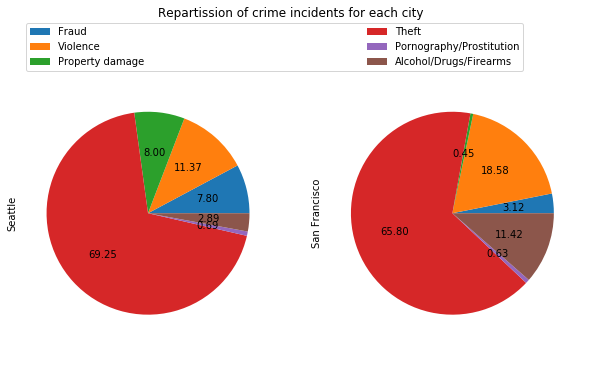

In [22]:
ax = cc_both.plot(kind="pie",autopct='%.2f',subplots=True,labels =None,figsize=(10, 6),title="Repartission of crime incidents for each city")
ax[0].legend(bbox_to_anchor=(0., 1., 2., .1),loc=0,labels=cc_both.index,ncol=2, mode="expand")
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

We first compare the distribution of crimes for either city and we find that in both case the 2 largest number of icnidents are classifiy as 

1. Theft, with Seattle having a larger propertion than San Francisco. 
2. Violence, with San Francisco having a larger proportion than Seatle

For Seattle Property damage and Fraud are quilte relevant, while Alcohol/Drugs/Firearms related incidents appear much less relevant. For San Francisco, these incidents represent the third most common type of incident and Property damage appear to be the less frequent type of incident. Both city have similar and very low proportion of prostitiution and pornography related incidents.



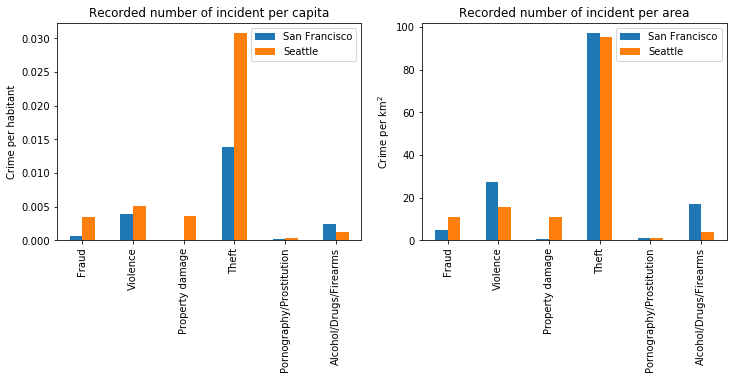

In [23]:
cc_capita = pd.DataFrame()
# divide by the population
for city in norm_city.index:
    cc_capita[city] = cc_both[city]/norm_city["population"].loc[city]
cc_area = pd.DataFrame()
# divide by the population
for city in norm_city.index:
    cc_area[city] = cc_both[city]/norm_city["area"].loc[city]
plt.figure(figsize=(12,4))
axl = plt.subplot(121)
ax1 = cc_capita.plot.bar(ax=axl,title="Recorded number of incident per capita")
tx1 = axl.set_ylabel("Crime per habitant")
axr = plt.subplot(122)
ax2 = cc_area.plot.bar(ax=axr,title="Recorded number of incident per area")
tx2 = axr.set_ylabel("Crime per km$^2$")

We then compare more directly the number of incidents. On the left side we divided the number of incidents by the number of habitant in order to scale this number to the population. In the right side we divide the number of incidents by the city area so as to estimate a crime density. 
The most striking feature is that it appears tha an inhabitant of Seattle was twice as much more likely to have been a victim of a theft during Summer 2014 tahn an inhabitant of San Francisco. As for violent crime the number apper to be quite similar still with a larger number for Sattle. 
As we look at the number of incident per km$^2$, we find the difference between cities to be less apparents. The density of Theft now appear very similar with a slightly lower density in Seatle. The density of violent crime in San Frascisco now appear twice as high as for Seatle. 
Whichever the rescaling factor we use (population or density), the number of Fraud related incident and Property damage appear larger in Seatle whether in San Francisco.



## Evolution of the number of incidents accross the summer

We first have a look at the evolution of number of incidents per day over the summer. We will normalise in each city the time frequency of incident by the total number of incident in the time period (e.g. june to august 2014).

### Day by day evolution 

In [24]:
# count for each city the number of crimes for each day by crime category
data_sf["norm"]   = 100./(1.*len(data_sf))
data_seat["norm"] = 100./(1.*len(data_seat))

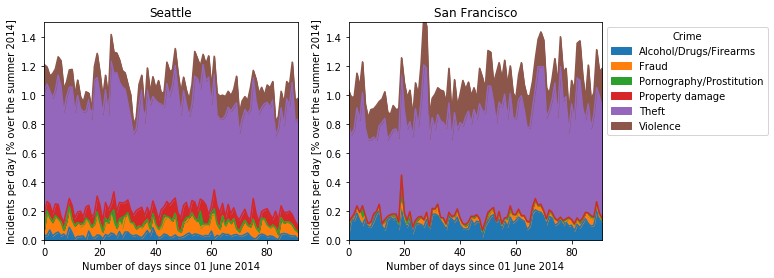

In [25]:
count_day_sf = data_sf[["day","Crime","norm"]].groupby(["day","Crime"]).sum()
count_day_seat = data_seat[["day","Crime","norm"]].groupby(["day","Crime"]).sum()
# plot the figure
plt.figure(figsize=(10,4))
axl = plt.subplot(121)
ax = count_day_seat["norm"].unstack(level=1,fill_value=0).plot.area(ax=axl,legend=None,title="Seattle")
y = plt.ylim([0,1.5])
lab = axl.set_xlabel("Number of days since %s" %startdate.strftime("%d %B %Y"))
lab = axl.set_ylabel("Incidents per day [% over the summer 2014]")
axr = plt.subplot(122)
ax = count_day_sf["norm"].unstack(level=1,fill_value=0).plot.area(ax=axr,title="San Francisco")
ax.get_legend().set_bbox_to_anchor((1., 1.))
y= plt.ylim([0,1.5])
lab = axr.set_xlabel("Number of days since %s" %startdate.strftime("%d %B %Y"))
lab = axr.set_ylabel("Incidents per day [% over the summer 2014]")

The data appear quite noisy. There may be a regular pattern in this data as for evolution over the summer, we may see some increase for San Francisco and a maybe a very slight decrease for Seattle. We need to check this at a weekly basis so as to reduce the noise ad improve the statistics

### Week by week  evolution

In [26]:
print "Sample for week %d started on a %s" %(startdate.isocalendar()[1],calendar.day_name[startdate.weekday()])
print "Sample for week %d ended on a %s" %(enddate.isocalendar()[1],calendar.day_name[enddate.weekday()])


Sample for week 22 started on a Sunday
Sample for week 35 ended on a Sunday


In [27]:
mean_sf = float(data_sf[["week","norm"]].loc[data_sf["week"]>22].groupby("week").sum().mean())
mean_seat = float(data_seat[["week","norm"]].loc[data_seat["week"]>22].groupby("week").sum().mean())

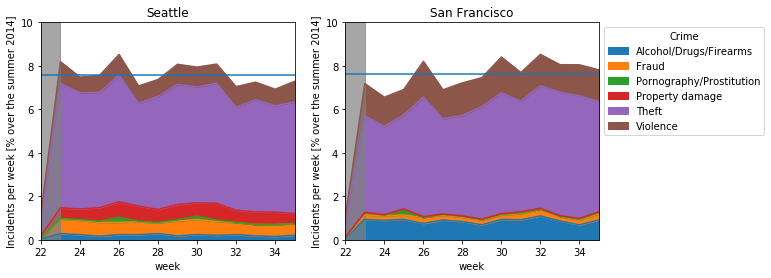

In [28]:
# count for each city the number of crimes for each week by crime category
count_week_sf = data_sf[["week","Crime","norm"]].groupby(["week","Crime"]).sum()
count_week_seat = data_seat[["week","Crime","norm"]].groupby(["week","Crime"]).sum()
# plot the figure
plt.figure(figsize=(10,4))
axl = plt.subplot(121)
ax = count_week_seat["norm"].unstack(level=1,fill_value=0).plot.area(ax=axl,legend=None,title="Seattle")
axl.axvspan(22, 23, alpha=0.7, color='gray')
axl.axhline(mean_seat)
y = plt.ylim([0,10])
lab = axl.set_ylabel("Incidents per week [% over the summer 2014]")
axr = plt.subplot(122)
ax = count_week_sf["norm"].unstack(level=1,fill_value=0).plot.area(ax=axr,title="San Francisco")
ax.get_legend().set_bbox_to_anchor((1., 1.))
axr.axvspan(22, 23, alpha=0.7, color='gray')
axr.axhline(mean_sf)
y = plt.ylim([0,10])
lab = axr.set_ylabel("Incidents per week [% over the summer 2014]")

The data appear less noisy once we use the week itself. We gray out the first data point since the first day of the smaple fall on the last day of week 22. The issue does not occur ate the end of the time period since the last day of the sample is a sunday. In order to show the trend over the summer we computed the mean daily frequency of crime strating from week 22. This serve as a guide line to see whether the trends we seem to infer were correct. And indeed the frequency of crimes appear to slightly decrease for Seattle while it increases slowlu for San Franscisco. 
The new question is which kind of incident incresed or decreased over the time period.

### Month by month evolution

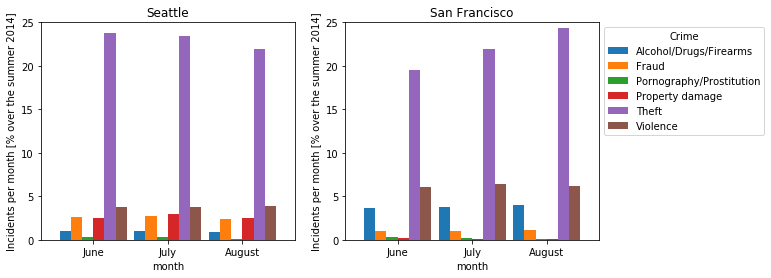

In [29]:
# count for each city the number of crimes for each week by crime category
count_month_sf   = data_sf[["month","Crime","norm"]].groupby(["month","Crime"]).sum().unstack(level=1,fill_value=0)
count_month_seat = data_seat[["month","Crime","norm"]].groupby(["month","Crime"]).sum().unstack(level=1,fill_value=0)
month            = [calendar.month_name[x] for x in  count_month_sf.index]
# plot the figure
plt.figure(figsize=(10,4))
axl = plt.subplot(121)
ax = count_month_seat["norm"].plot.bar(stacked=False,ax=axl,title="Seattle",legend=None,rot=0,width=0.9)
axl.set_xticklabels(month)
lab = axl.set_ylabel("Incidents per month [% over the summer 2014]")
y = plt.ylim([0,25])
#plt.yscale("log")
axr = plt.subplot(122)
ax = count_month_sf["norm"].plot.bar(stacked=False,ax=axr,title="San Francisco",rot=0, width=0.9)
axr.set_xticklabels(month)
lab = axr.set_ylabel("Incidents per month [% over the summer 2014]")
y = plt.ylim([0,25])
#plt.yscale("log")
ax.get_legend().set_bbox_to_anchor((1., 1.))

Using the monthly evolution, we notice that the dominant factor in those evolution is the number of theft.

## Weekly and daily trends

### Weekly evolution

In [30]:
# extract the number of weekday accross the summer
summerday  = set([x.date() for x in data_sf["datetime"]]) 
daynumber  = Counter([x.weekday() for x in list(summerday)])
# get the mean to estimate the mean number of weeks so that all is rescaled to one
dayscale   = pd.np.mean(daynumber.values())

In [31]:
# for clarity we seperate crime in top row and bottom rows
topcol = ["Theft","Violence"]
botcol = ["Alcohol/Drugs/Firearms", "Fraud", "Pornography/Prostitution","Property damage"]

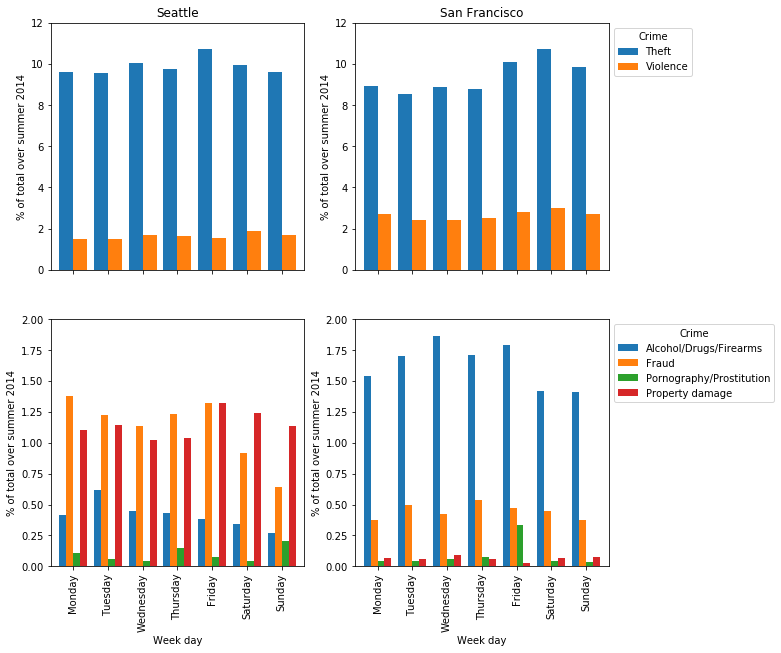

In [32]:
# count for each city the number of crimes for each week by crime category
count_weekday_sf   = data_sf[["weekday","Crime","norm"]].groupby(["weekday","Crime"]).sum().unstack(level=1,fill_value=0)["norm"]
count_weekday_seat = data_seat[["weekday","Crime","norm"]].groupby(["weekday","Crime"]).sum().unstack(level=1,fill_value=0)["norm"]
# rescale by the distribution of the number of weekdays during the sample
# More precisely correct for the extra sunday
for wday in daynumber.keys():
    count_weekday_sf.loc[wday]   = count_weekday_sf.loc[wday]*dayscale/(1.*daynumber[wday])
    count_weekday_seat.loc[wday] = count_weekday_seat.loc[wday]*dayscale/(1.*daynumber[wday])
# plot the figure
plt.figure(figsize=(10,10))
axtl = plt.subplot(221)
ax = count_weekday_seat[topcol].plot.bar(stacked=False,ax=axtl,title="Seattle",legend=None,width=0.8)
lab = axtl.set_xticklabels("")
lab = axtl.set_xlabel("")
lab = axtl.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,12])
axtr = plt.subplot(222)
ax = count_weekday_sf[topcol].plot.bar(stacked=False,ax=axtr,title="San Francisco",width=0.8)
ax.get_legend().set_bbox_to_anchor((1., 1.))
lab = axtr.set_xticklabels("")
lab = axtr.set_xlabel("")
lab = axtr.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,12])
axbl = plt.subplot(223)
ax = count_weekday_seat[botcol].plot.bar(ax=axbl,legend=False,width=0.8)
lab = axbl.set_xticklabels(calendar.day_name)
lab = axbl.set_xlabel("Week day")
lab = axbl.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,2])
axbr = plt.subplot(224)
ax = count_weekday_sf[botcol].plot.bar(ax=axbr,width=0.8)
ax.get_legend().set_bbox_to_anchor((1., 1.))
lab = axbr.set_xticklabels(calendar.day_name)
lab = axbr.set_xlabel("Week day")
lab = axbr.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,2])

* Theft occur quite unformaly over the week in Seatle with a sligth peak on Friday. Theft are a bit more sensitive on week day in San Francisco with some higher values over the week end. This is pretty significant since this type of crime is the most current. It could account for the noise we observed.
* Violence seems to occur quite evently over the week in both cities
* Alcohol/Drugs/Firearms crimes are more current in Seattle on tuesdays, but remember they are overall pretty rare compared to San Franscico where they appear more uniform with a higher from Tuesday to Friday.
* Fraud seems to be less frequent during the week end than week-days in Seattle. But there is no clear trend in the case of San Francisco
* The crime most sensitive to the week day is the number of Pronography/Prostitition related incidents. These most likely occur on Thursdays and Sundays in Seattle but on Fridys in San Francisco. 
* As for property damage, in the case of Seattle there is a sharp increase for thursday to friday, followed by a decrease over the week end.

### Daily evolution

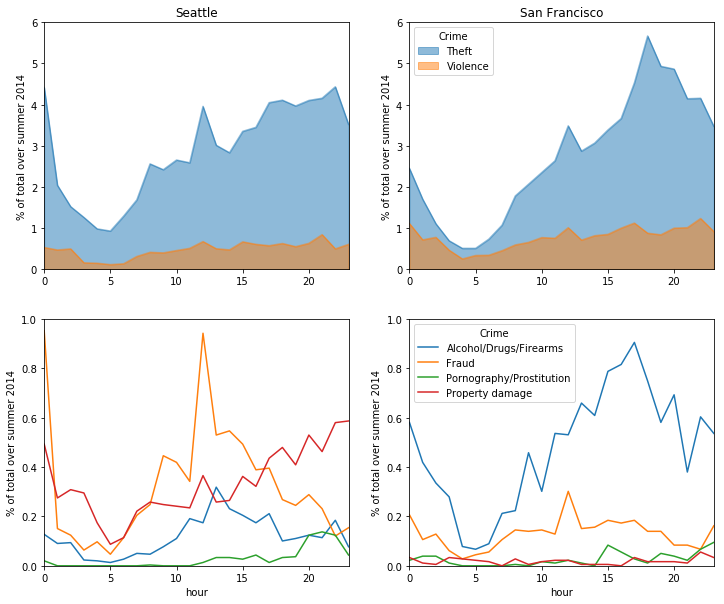

In [33]:
# count for each city the number of crimes for each week by crime category
count_hour_sf   = data_sf[["hour","Crime","norm"]].groupby(["hour","Crime"]).sum().unstack(level=1,fill_value=0)["norm"]
count_hour_seat = data_seat[["hour","Crime","norm"]].groupby(["hour","Crime"]).sum().unstack(level=1,fill_value=0)["norm"]
# plot the figure
plt.figure(figsize=(12,10))
axtl = plt.subplot(221)
ax = count_hour_seat[topcol].plot.area(stacked=False,ax=axtl,title="Seattle",legend=None)
lab = axtl.set_xlabel("")
lab = axtl.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,6])
axtr = plt.subplot(222)
ax = count_hour_sf[topcol].plot.area(stacked=False,ax=axtr,title="San Francisco")
lab = axtr.set_xlabel("")
lab = axtr.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,6])
axbl = plt.subplot(223)
ax = count_hour_seat[botcol].plot(ax=axbl,legend=False,rot=0)
lab = axbl.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,1])
axbr = plt.subplot(224)
ax = count_hour_sf[botcol].plot(ax=axbr,rot=0)
lab = axbr.set_ylabel("% of total over summer 2014")
y = plt.ylim([0,1])

In term of distribution of incident during the day we see very similar pattern.

* We see a strong dip in the number of crimes form midnight to 8am. The only exception is for Property damege in San Francisco where the minima centered on 5am.
* Theft show a strong increasing pattern from 8am to 9 pm for Seattle and to 10 pm in San Francisco, where a strong increase of Property damage is apparent until midnight.
* In Seattle Alcohol/Drugs/Firearms infractions seem to occur more between 10 am and 6 pm with a maxima around midday. And for San Francisco the maxima is reached arounf 4pm. 
* Frand appear to happen more frequently during daytime, We notice a large value at midnight. It is possible that given the type of crime, the exact time of the fraud remained unknown.
* For Pornography and Prostitution incident, we see a slow increase in both cities form early afternoon until midnight, and a maxima between 8pm ans midnight in Seattle.


# Conclusion

We performed a comparative analysis of recorded crimes in both Seattle and San Francisco, during the summer of 2014. 

* To achieve this analysis, we defined and derived common feature from both original datasets.
* In both cities the most common crimes appear to be theft followed by violent incidents
* The number of crime per capita appear higher in Seatle, most probalbly dure to large occurance of theft. Still he difference appear much less apparent once we compare the density of such incident
* During that summer, the number of incident appear to be slighty decreasing in Seattle while increasing in San Francisco.
* Further difference somewhat appear in the pattern of incident during the week.
* The number of incident is most usualy low between midnight and 8am. And except for Frand which tend to occur during work hours, the emerging pattern appears to be an increasing number of crime over the day until late evening.  